In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
%matplotlib inline

In [3]:
maximum_csv_read_cound = 10

In [4]:
%ls

 C 드라이브의 볼륨: System
 볼륨 일련 번호: F866-1019

 C:\Users\user.DLI-N19\Documents 디렉터리

2018-08-31  오전 08:41    <DIR>          .
2018-08-31  오전 08:41    <DIR>          ..
2018-08-30  오후 05:03    <DIR>          .ipynb_checkpoints
2018-08-31  오전 08:39                 0 activity_sensor_x.csv
2018-08-24  오전 09:06    <DIR>          Bluetooth Folder
2018-08-30  오전 08:55    <DIR>          cache
2018-08-30  오후 01:09            74,594 car_classification.ipynb
2018-08-31  오전 08:41           228,357 challenge_LinearRegression.ipynb
2018-08-31  오전 08:41           219,619 challenge_prepare.ipynb
2018-08-30  오후 05:02       112,716,095 HT_Sensor_dataset.dat
2018-08-31  오전 08:41             2,845 time_series_sensor.ipynb
2018-08-30  오전 08:59            83,914 Untitled.ipynb
               7개 파일         113,325,424 바이트
               5개 디렉터리  44,801,593,344 바이트 남음


In [5]:
folder_root = '2016 PHM DATA CHALLENGE CMP DATA SET/2016 PHM DATA CHALLENGE CMP DATA SET/'
folder_train = folder_root + 'CMP-data/training/'
folder_test = folder_root + '/CMP-data/test/'
path_train_gt = folder_root + '/CMP-training-removalrate.csv'
path_test_gt = 'PHM16TestValidationAnswers/PHM16TestValidationAnswers/orig_CMP-test-removalrate.csv'
paths_train = glob.glob(folder_train+'*.csv')
paths_test = glob.glob(folder_test+'*.csv')
paths_train[0],paths_test[0],len(paths_train),len(paths_test)


('2016 PHM DATA CHALLENGE CMP DATA SET/2016 PHM DATA CHALLENGE CMP DATA SET/CMP-data/training\\CMP-training-000.csv',
 '2016 PHM DATA CHALLENGE CMP DATA SET/2016 PHM DATA CHALLENGE CMP DATA SET//CMP-data/test\\CMP-test-000.csv',
 185,
 185)

## 학습데이터와 테스트 데이터 읽기 

In [1139]:
df_gt = pd.read_csv(path_train_gt)
df_gt.shape

(1981, 3)

In [1140]:
df_gt_test = pd.read_csv(path_test_gt)
df_gt_test.shape

(424, 3)

In [1141]:
def read_cvs_files(folder, maximum_read_cound):
    df_list = []    
    for i in range(np.minimum(maximum_read_cound,len(folder))):
        df = pd.read_csv(folder[i])
        df_list.append(df)
    print(len(df_list), df.shape)
    df = pd.concat(df_list, 0)
    return df    

In [1142]:
df_train = read_cvs_files(paths_train, maximum_csv_read_cound)
df = df_train
df_train.shape, len(df_train)

10 (4050, 25)


((55627, 25), 55627)

In [1143]:
df_test = read_cvs_files(paths_test, maximum_csv_read_cound)
df_test.shape

10 (2712, 25)


(10472, 25)

In [1144]:
train_m = (df_train.WAFER_ID.astype(np.str) + df_train.STAGE).nunique()
test_m = (df_test.WAFER_ID.astype(np.str) + df_test.STAGE).nunique()
train_m,test_m

(162, 28)

### concat train/test set

In [1145]:
df_X = pd.concat((df_train, df_test))
df_Y = pd.concat((df_gt, df_gt_test))
df_X.shape, df_Y.shape

((66099, 25), (2405, 3))

In [1146]:
df_Y.head()

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905


## 전처리 convert category to int

In [1147]:
pd.get_dummies(df_Y).head()

,WAFER_ID,AVG_REMOVAL_RATE,STAGE_A,STAGE_B
0,-4224160600,61.65480,1,0
1,-4224160584,75.86415,0,1
2,-4224160580,71.90700,0,1
3,-4113511818,65.02230,1,0
4,-4113511814,58.27905,1,0


In [1148]:
df_Y_dumm = pd.get_dummies(df_Y).drop(columns='STAGE_A')

In [1149]:
df_Y_dumm = df_Y_dumm.rename(columns={'STAGE_B':'STAGE'})

In [1150]:
df_Y_dumm = df_Y_dumm
df_Y_dumm.head()

,WAFER_ID,AVG_REMOVAL_RATE,STAGE
0,-4224160600,61.65480,0
1,-4224160584,75.86415,1
2,-4224160580,71.90700,1
3,-4113511818,65.02230,0
4,-4113511814,58.27905,0


In [1151]:
train_unique_WAFER_m = df_train.WAFER_ID.nunique()
df_train.WAFER_ID.nunique(),df_test.WAFER_ID.nunique()

(124, 28)

In [1152]:
df_X.head()

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,565.6,34.651163,0.0,156.8,1.0,60.909091
1,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.909091
2,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.909091
3,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.606061
4,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.0,156.8,1.0,60.909091


In [1170]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66099 entries, 0 to 2711
Data columns (total 25 columns):
MACHINE_ID                      66099 non-null object
MACHINE_DATA                    66099 non-null object
TIMESTAMP                       66099 non-null float64
WAFER_ID                        66099 non-null int64
STAGE                           66099 non-null object
CHAMBER                         66099 non-null float64
USAGE_OF_BACKING_FILM           66099 non-null float64
USAGE_OF_DRESSER                66099 non-null float64
USAGE_OF_POLISHING_TABLE        66099 non-null float64
USAGE_OF_DRESSER_TABLE          66099 non-null float64
PRESSURIZED_CHAMBER_PRESSURE    66099 non-null float64
MAIN_OUTER_AIR_BAG_PRESSURE     66099 non-null float64
CENTER_AIR_BAG_PRESSURE         66099 non-null float64
RETAINER_RING_PRESSURE          66099 non-null float64
RIPPLE_AIR_BAG_PRESSURE         66099 non-null float64
USAGE_OF_MEMBRANE               66099 non-null float64
USAGE_OF_PRESSURI

In [1171]:
df_X.MACHINE_ID.nunique(),df_X.MACHINE_ID.unique()

(1, array([2], dtype=object))

In [1172]:
df_X.MACHINE_DATA.nunique(),df_X.MACHINE_DATA.unique()

(6, array([1, 2, 3, 4, 5, 6], dtype=object))

In [1173]:
df_X.WAFER_ID = df_X.WAFER_ID.astype(np.int64)

In [1174]:
df_X_dumm = pd.get_dummies(df_X).drop(columns='STAGE_A')
df_X_dumm['STAGE'] = df_X_dumm.STAGE_B

In [1175]:
df_X_dumm.head()

,TIMESTAMP,WAFER_ID,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,...,EDGE_AIR_BAG_PRESSURE,MACHINE_ID_2,MACHINE_DATA_1,MACHINE_DATA_2,MACHINE_DATA_3,MACHINE_DATA_4,MACHINE_DATA_5,MACHINE_DATA_6,STAGE_B,STAGE
0,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,346.8,101.875,...,60.909091,1,1,0,0,0,0,0,0,0
1,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,348.0,101.875,...,60.909091,1,1,0,0,0,0,0,0,0
2,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,346.8,101.875,...,60.909091,1,1,0,0,0,0,0,0,0
3,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,66.666667,348.0,101.875,...,60.606061,1,1,0,0,0,0,0,0,0
4,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,348.0,101.875,...,60.909091,1,1,0,0,0,0,0,0,0


## 간단 테스트 : 웨이퍼와 STAGE의 그룹별 평균만 뽑아서  학습해본다

In [1176]:
len(df_X_dumm.groupby(['WAFER_ID','STAGE']))

190

In [1177]:
wafer_group = df_X_dumm.groupby(['WAFER_ID','STAGE'])

In [1178]:
group_list = [wafer_group.get_group(x) for x in wafer_group.groups]

In [1179]:
WAFER_ID_list = [x for x in wafer_group.groups]
len(WAFER_ID_list)

190

In [1180]:
len(group_list)

190

In [1181]:
WAFER_ID_list[0]

(-4230160598, 0)

In [1182]:
AVG_REMOVAL_RATE_list = []
for id, stage in WAFER_ID_list:
    cond1 = df_Y_dumm.WAFER_ID==id
    cond2 = df_Y_dumm.STAGE==stage
    cond = np.logical_and(cond1,cond2)
    AVG_REMOVAL_RATE_list.append(df_Y_dumm[cond].AVG_REMOVAL_RATE.values)
len(AVG_REMOVAL_RATE_list)

190

In [1183]:
df_gt.head()

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905


In [1243]:
wafer_group.mean().head()

TIMESTAMP   CHAMBER  USAGE_OF_BACKING_FILM  \
WAFER_ID    STAGE                                                  
-4230160598 0      4.818060e+08  4.670520             890.069846   
-4230160594 1      4.818593e+08  4.890625            1291.998698   
-4228160702 0      4.817933e+08  4.656977             720.477229   
            1      4.818717e+08  4.649860            1385.847339   
-4228160694 1      4.818591e+08  4.653409            1285.104167   

                   USAGE_OF_DRESSER  USAGE_OF_POLISHING_TABLE  \
WAFER_ID    STAGE                                               
-4230160598 0            634.444444                207.186898   
-4230160594 1            659.116030                216.944444   
-4228160702 0            626.471792                 56.240310   
            1            663.872808                300.307086   
-4228160694 1            658.696338                210.827020   

                   USAGE_OF_DRESSER_TABLE  PRESSURIZED_CHAMBER_PRESSURE  \
WAFER_ID    STAGE                                                         
-4230160598 0                 2734.000000                     65.993669   
-4230160594 1                 2750.653320                     93.115699   
-4228160702 0                 2728.619186                     34.432447   
            1                 2753.864846                     60.332133   
-4228160694 1                 2750.500000                     67.356602   

                   MAIN_OUTER_AIR_BAG_PRESSURE  CENTER_AIR_BAG_PRESSURE  \
WAFER_ID    STAGE                                                         
-4230160598 0                       203.230058                54.104949   
-4230160594 1                       312.839062                73.184814   
-4228160702 0                       105.526744                28.097747   
            1                       205.731092                59.672619   
-4228160694 1                       204.160227                52.330433   

                   RETAINER_RING_PRESSURE   ...     DRESSING_WATER_STATUS  \
WAFER_ID    STAGE                           ...                             
-4230160598 0                 1606.416763   ...                  0.580925   
-4230160594 1                 1834.858594   ...                  0.484375   
-4228160702 0                  803.615407   ...                  0.572674   
            1                 1400.875630   ...                  0.638655   
-4228160694 1                 1519.515341   ...                  1.000000   

                   EDGE_AIR_BAG_PRESSURE  MACHINE_ID_2  MACHINE_DATA_1  \
WAFER_ID    STAGE                                                        
-4230160598 0                  38.540025           1.0             0.0   
-4230160594 1                  47.890625           1.0             0.0   
-4228160702 0                  20.059901           1.0             0.0   
            1                  40.009337           1.0             0.0   
-4228160694 1                  37.128099           1.0             0.0   

                   MACHINE_DATA_2  MACHINE_DATA_3  MACHINE_DATA_4  \
WAFER_ID    STAGE                                                   
-4230160598 0                 0.0             0.0        0.540462   
-4230160594 1                 0.0             0.0        0.386719   
-4228160702 0                 0.0             0.0        0.549419   
            1                 0.0             0.0        0.554622   
-4228160694 1                 0.0             0.0        0.551136   

                   MACHINE_DATA_5  MACHINE_DATA_6  STAGE_B  
WAFER_ID    STAGE                                           
-4230160598 0            0.248555        0.210983      0.0  
-4230160594 1            0.335938        0.277344      1.0  
-4228160702 0            0.244186        0.206395      0.0  
            1            0.240896        0.204482      1.0  
-4228160694 1            0.244318        0.204545      1.0  

[5 rows x 29 columns]

##  데이터 준비끝. 데이터 numpy 배열로 변환

In [1185]:
X = np.array(wafer_group.mean())
Y = np.array(AVG_REMOVAL_RATE_list)

X.shape, Y.shape

((190, 29), (190, 1))

## 스케일러로 정규화

In [1186]:
from sklearn.preprocessing import MinMaxScaler

In [1187]:
scaler = MinMaxScaler().fit(X)

In [1188]:
XN = scaler.transform(X)

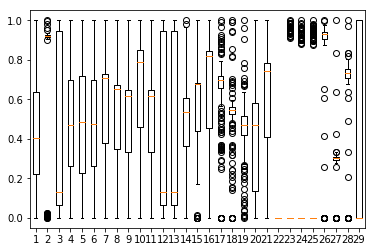

In [1189]:
axis = plt.boxplot(XN)

## 학습데이터와 테스트 데이터 붙여 놓은것을  분리한다

In [1191]:
train_m,test_m, XN.shape

(162, 28, (190, 29))

In [1192]:
X_train_valid = XN[:train_m]
Y_train_valid = Y[:train_m]
X_test = XN[train_m:]
Y_test = Y[train_m:]
X_train_valid.shape,Y_train_valid.shape, X_test.shape,Y_test.shape

((162, 29), (162, 1), (28, 29), (28, 1))

## 학습데이터를 train 과 valid 셋으로 분리한다

In [1190]:
from sklearn.model_selection import train_test_split

In [1200]:
seed = np.random.randint(100)
train_test_ratio = 0.5
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid,Y_train_valid,test_size = train_test_ratio,random_state=seed)
X_train.shape, X_valid.shape,Y_train.shape, Y_valid.shape,seed

((81, 29), (81, 29), (81, 1), (81, 1), 75)

## 선형 회귀모델로 간단히 학습시켜 본다

In [1201]:
from sklearn.linear_model import LinearRegression

In [1202]:
model = LinearRegression().fit(X_train,Y_train)

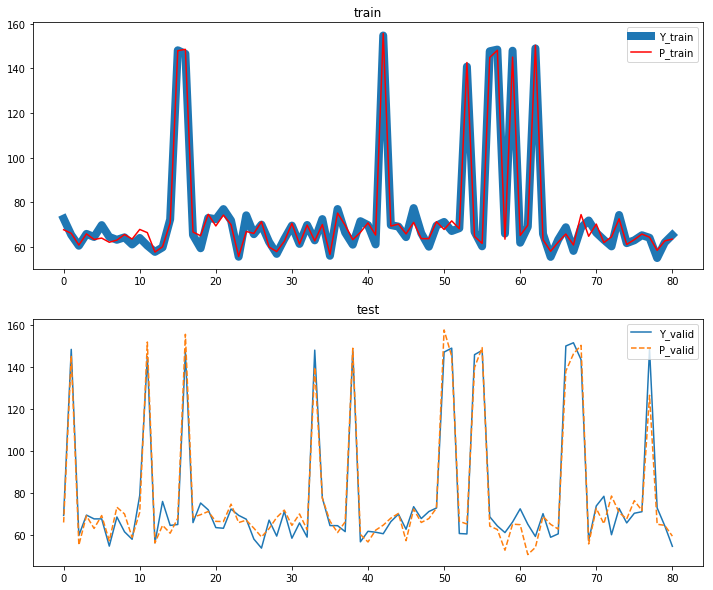

In [1244]:
fig, axes = plt.subplots(2,1,figsize=(12,10))
axes[0].plot(Y_train,linewidth=8)
axes[0].plot(model.predict(X_train),c='r',linestyle='-')
axes[0].set_title('train')
axes[0].legend(['Y_train','P_train'])

axes[1].plot(Y_valid)
axes[1].plot(model.predict(X_valid),linestyle='--')
axes[1].set_title('test')
axes[1].legend(['Y_valid','P_valid'])

## 결정계수로 성능을 측정한다

In [1204]:
model.score(X_train,Y_train), model.score(X_valid,Y_valid), model.score(X_test,Y_test)

(0.9876623376723829, 0.9604380978573369, 0.9497972390322201)

## 예측 결과의 제출물 파일 작성하기  

In [1205]:
test_WAFFER_ID_list = WAFER_ID_list[train_m:]
len(test_WAFFER_ID_list),test_WAFFER_ID_list[0]

(28, (329446886, 0))

In [1206]:
X_test_predict = model.predict(X_test)
X_test_predict.shape

(28, 1)

In [1207]:
test_submit = np.concatenate( (test_WAFFER_ID_list, X_test_predict), -1)
test_submit.shape

(28, 3)

In [1208]:
submit_file = 'predict_park1000.csv'
np.savetxt(submit_file,test_submit, delimiter=',',header='WAFER_ID,STAGE,AVG_REMOVAL_RATE')
%ls *.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5ACF-C43B

 C:\Users\sogan\Documents\PHM 디렉터리

2018-08-10  오전 11:53             2,163 predict_park1000.csv
               1개 파일               2,163 바이트
               0개 디렉터리  144,467,423,232 바이트 남음


In [1239]:
submit_df = pd.read_csv(submit_file)

In [1240]:
submit_df.STAGE[submit_df.STAGE==0] = 'A'
submit_df.STAGE[submit_df.STAGE==1] = 'B'

In [1241]:
submit_df.head()

,# WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,329446886.0,A,164.234356
1,329446898.0,A,155.627957
2,329446902.0,A,140.064167
3,329446906.0,A,148.816559
4,329446910.0,A,148.948423
